In [1]:
import pandas as pd
import os 
import random
from tqdm import tqdm
import dtale
import matplotlib.pyplot as plt

## Load in Reddit Data

In [2]:
filepath = "data/labelled_data/"

In [3]:
all_files = os.listdir(filepath)
comments = {}
posts = {}
for fname in tqdm(all_files):
    file = pd.read_csv(filepath+fname,sep='\t').drop('Unnamed: 0',axis=1)
    if 'submission' in fname:
        posts['_'.join(fname.split('_')[3:6])] = file      
    if 'comment' in fname:
        comments['_'.join(fname.split('_')[3:6])] = file
        
        
subset = []
for date,df in posts.items():
    df['date'] = date
    subset.append(df)
    
    
merged_posts = pd.concat(subset)
subset = []
for date,df in comments.items():
    df['date'] = date
    subset.append(df)
    
merged_comments = pd.concat(subset)


cols = ['corpus','date','subreddit','conflict','similarity','knowledge','power','status','support','identity','romance','trust','fun']
posts_df = merged_posts[cols]
comments_df = merged_comments[cols]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 590/590 [00:10<00:00, 58.22it/s]


In [4]:
subset = []
for date,df in posts.items():
    df['date'] = date
    subset.append(df)
    
    
merged_posts = pd.concat(subset)
subset = []
for date,df in comments.items():
    df['date'] = date
    subset.append(df)
    
merged_comments = pd.concat(subset)

In [5]:
cols = ['corpus','date','subreddit','conflict','similarity','knowledge','power','status','support','identity','romance','trust','fun']
posts_df = merged_posts[cols]
comments_df = merged_comments[cols]

In [6]:
posts_df

,corpus,date,subreddit,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
0,huh removed,2022_10_19,Bitcoin,0.554512,0.497601,0.430458,0.421383,0.433016,0.451236,0.480207,0.347141,0.460343,0.734248
1,thoughts nan,2022_10_19,Bitcoin,0.482155,0.482372,0.379812,0.432790,0.557055,0.545566,0.473274,0.575579,0.489739,0.644310
2,upcoming bitcoin trend removed,2022_10_19,Bitcoin,0.490358,0.436900,0.555486,0.497024,0.425656,0.425173,0.471847,0.220831,0.502855,0.426152
3,grayscale marks another all time discount reco...,2022_10_19,Bitcoin,0.165885,0.337131,0.742628,0.166191,0.350450,0.194612,0.411289,0.146768,0.264524,0.498372
4,barely sociable s video on satoshi nakamoto re...,2022_10_19,Bitcoin,0.487014,0.421258,0.595137,0.225521,0.373997,0.366704,0.457680,0.059590,0.392610,0.864695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,polkadot news today get the kanaria birds out nan,2022_04_12,Polkadot,0.289050,0.456930,0.528622,0.438773,0.416435,0.486686,0.373486,0.044448,0.197453,0.665351
220,why was i randomly banned from the polkadot di...,2022_04_12,Polkadot,0.743910,0.540374,0.528330,0.227609,0.277831,0.132191,0.446440,0.023150,0.070431,0.562017
221,be aware of this fake twitter user and scam si...,2022_04_12,Polkadot,0.406584,0.432570,0.569079,0.273209,0.392553,0.214049,0.405285,0.005370,0.664166,0.653440
222,just a few days to go for decoded voting who g...,2022_04_12,Polkadot,0.457784,0.322461,0.599916,0.318529,0.218505,0.331018,0.291270,0.003052,0.000002,0.427545


## Load in Correlation Data

In [7]:
coin_path = "data/coins/"
coin_fnames = os.listdir(coin_path)
coin_frames = {fname.split('.')[0].split('-')[1]:pd.read_csv(coin_path+fname).drop('Unnamed: 0',axis=1) for fname in coin_fnames}
coin_frames['SOL'].head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-09-18,33.748275,33.954715,30.979143,31.059854,6.948700e+08,1.099878e+10
1,2022-09-17,32.212245,33.848180,32.212245,33.750778,5.013024e+08,1.194725e+10
2,2022-09-16,33.044593,33.203124,31.641165,32.208857,7.659525e+08,1.140126e+10
3,2022-09-15,34.094293,34.715268,32.721894,33.047682,1.139378e+09,1.169821e+10
4,2022-09-14,33.018278,34.283197,32.870454,34.091570,1.003604e+09,1.206287e+10


In [8]:
coin_frames['ETH'].sort_values('Date').head(150).tail(50)['Date']

2499    2015-11-15
2498    2015-11-16
2497    2015-11-17
2496    2015-11-18
2495    2015-11-19
2494    2015-11-20
2493    2015-11-21
2492    2015-11-22
2491    2015-11-23
2490    2015-11-24
2489    2015-11-25
2488    2015-11-26
2487    2015-11-27
2486    2015-11-28
2485    2015-11-29
2484    2015-11-30
2483    2015-12-01
2482    2015-12-02
2481    2015-12-03
2480    2015-12-04
2479    2015-12-05
2478    2015-12-06
2477    2015-12-07
2476    2015-12-08
2475    2015-12-09
2474    2015-12-10
2473    2015-12-11
2472    2015-12-12
2471    2015-12-13
2470    2015-12-14
2469    2015-12-15
2468    2015-12-16
2467    2015-12-17
2466    2015-12-18
2465    2015-12-19
2464    2015-12-20
2463    2015-12-21
2462    2015-12-22
2461    2015-12-23
2460    2015-12-24
2459    2015-12-25
2458    2015-12-26
2457    2015-12-27
2456    2015-12-28
2455    2015-12-29
2454    2015-12-30
2453    2015-12-31
2452    2016-01-01
2451    2016-01-02
2450    2016-01-03
Name: Date, dtype: object

## Correlations

NameError: name 'sol_agg_std' is not defined

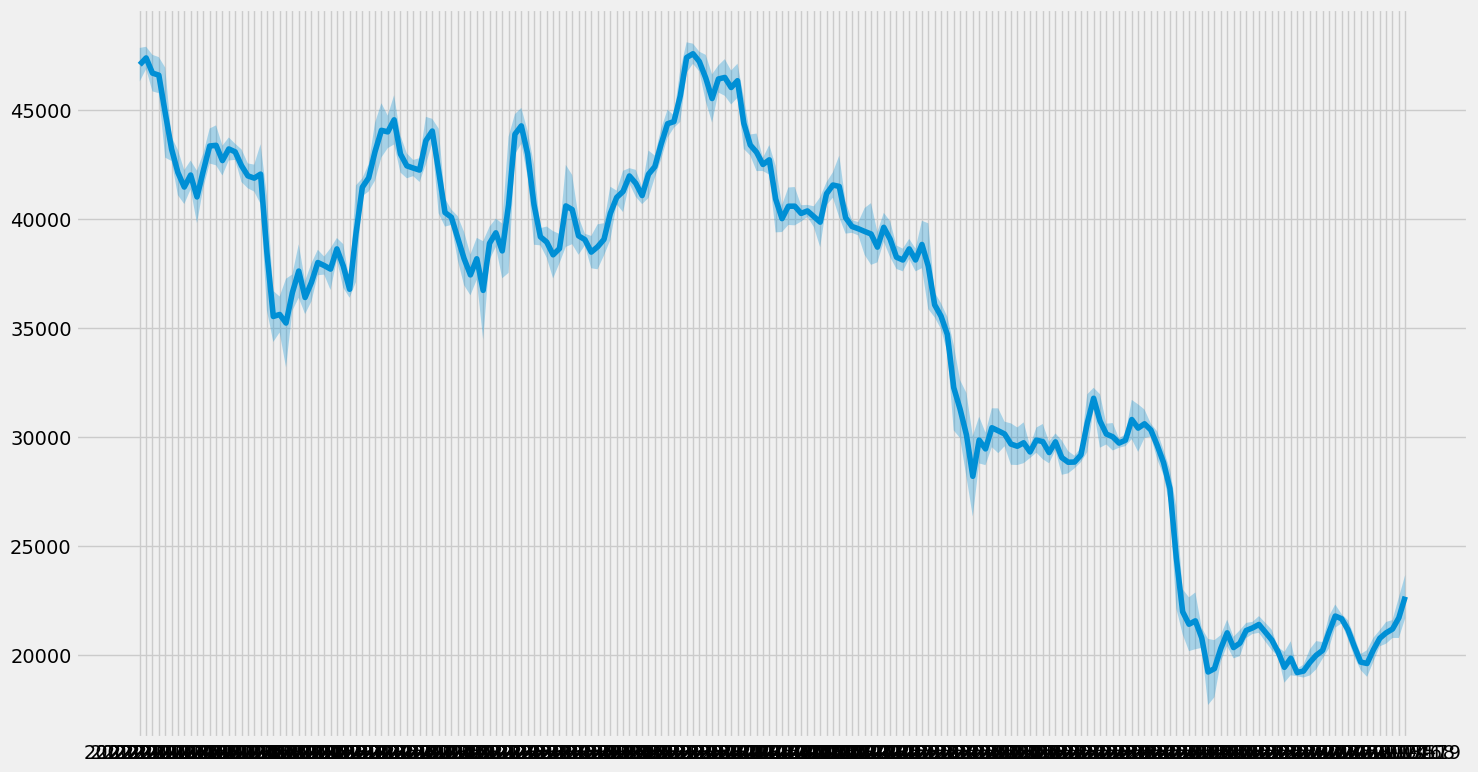

In [10]:
sol_view = coin_frames['BTC'].loc[coin_frames['BTC'].Date>='2022-01-01'].sort_values('Date').head(200)
sol_view['Mean'] = [(row['High']+row['Low'])/2 for k,row in sol_view.iterrows()]
plt.style.use('fivethirtyeight')
plt.figure(figsize=[16,9])
plt.plot(sol_view['Date'],sol_view['Mean'])
plt.fill_between(sol_view['Date'],
                 sol_view['Low'],
                 sol_view['High'],
                 alpha=.3)
plt.show()

In [11]:
sol_reddit = comments_df.loc[comments_df.subreddit == 'Bitcoin']
sol_reddit.head()

,corpus,date,subreddit,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
0,stop spamming,2022_04_29,Bitcoin,0.702035,0.465658,0.490737,0.517822,0.444598,0.431845,0.446001,0.299353,4.692118e-01,0.567869
1,well we are still far from adoption and these ...,2022_04_29,Bitcoin,0.173128,0.980104,0.985543,0.015149,0.123361,0.652459,0.299305,0.004096,8.404564e-07,0.555005
2,that s something good for your fam man keep yo...,2022_04_29,Bitcoin,0.003582,0.030860,0.093066,0.010959,0.889812,0.800225,0.134401,0.033620,1.004633e-06,0.977037
3,nah its simply because these are the countries...,2022_04_29,Bitcoin,0.795427,0.519907,0.727792,0.212250,0.149566,0.134155,0.573781,0.010138,9.990198e-07,0.357319
4,that s a big goal and price will not remain un...,2022_04_29,Bitcoin,0.440516,0.435332,0.735598,0.612067,0.222528,0.445718,0.443989,0.000460,5.332424e-01,0.024337


In [12]:
sol_reddit.columns[1:]

Index(['date', 'subreddit', 'conflict', 'similarity', 'knowledge', 'power',
       'status', 'support', 'identity', 'romance', 'trust', 'fun'],
      dtype='object')

In [21]:
#df_nat['new_cases'].rolling(7).sum()
sol_ss = sol_reddit[sol_reddit.columns[1:]]
for col in dfs.keys():
    st = col
    sol_ss[st] = sol_ss[col].rolling(7).mean()

/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_1704/3071164930.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
sol_agg_std

,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
date,,,,,,,,,,
2022_01_03,0.218324,0.257425,0.230064,0.273903,0.183787,0.213641,0.103545,0.208227,0.263854,0.170555
2022_01_04,0.183712,0.229272,0.237573,0.254520,0.178484,0.212948,0.084857,0.215099,0.262708,0.166324
2022_01_05,0.223415,0.233003,0.237522,0.259587,0.178299,0.211105,0.082279,0.184976,0.279418,0.164753
2022_01_06,0.240790,0.266163,0.253489,0.267516,0.175335,0.220966,0.094246,0.174125,0.263761,0.199541
2022_01_07,0.208121,0.251779,0.246644,0.266891,0.196111,0.217700,0.091747,0.181290,0.271275,0.192710
...,...,...,...,...,...,...,...,...,...,...
2022_11_03,0.211992,0.231488,0.236999,0.256491,0.181570,0.213621,0.101287,0.213913,0.251516,0.175184
2022_11_06,0.185289,0.205509,0.215401,0.230911,0.164983,0.194020,0.088594,0.240978,0.240355,0.167534
2022_11_07,0.206074,0.244751,0.224774,0.271576,0.173921,0.216491,0.100205,0.220673,0.278614,0.161474


In [16]:
sol_reddit = sol_reddit.sort_values('date')
sol_agg_mean = sol_reddit[sol_reddit.columns[1:]].groupby("date").median().reset_index()
#sol_agg_mean = sol_ss
sol_agg_std = sol_reddit.groupby("date").std()

In [19]:
#sol_agg_std.index.tolist()
#sol_agg_mean[col].values.tolist()

#sol_agg_mean[col].values
#sol_agg_std[col].values

#sol_agg_mean

In [20]:
dfs = {}

for col in sol_agg_std.columns:
    dim_dict = {'date':sol_agg_std.index.tolist(),
                'mean':sol_agg_mean[col].values.tolist(),
                'min':list((sol_agg_mean[col].values-sol_agg_std[col].values)),
                'max':list((sol_agg_mean[col].values+sol_agg_std[col].values))}
    
    
    
    
    dfs[col] = pd.DataFrame(dim_dict)

In [ ]:
dfs['conflict']

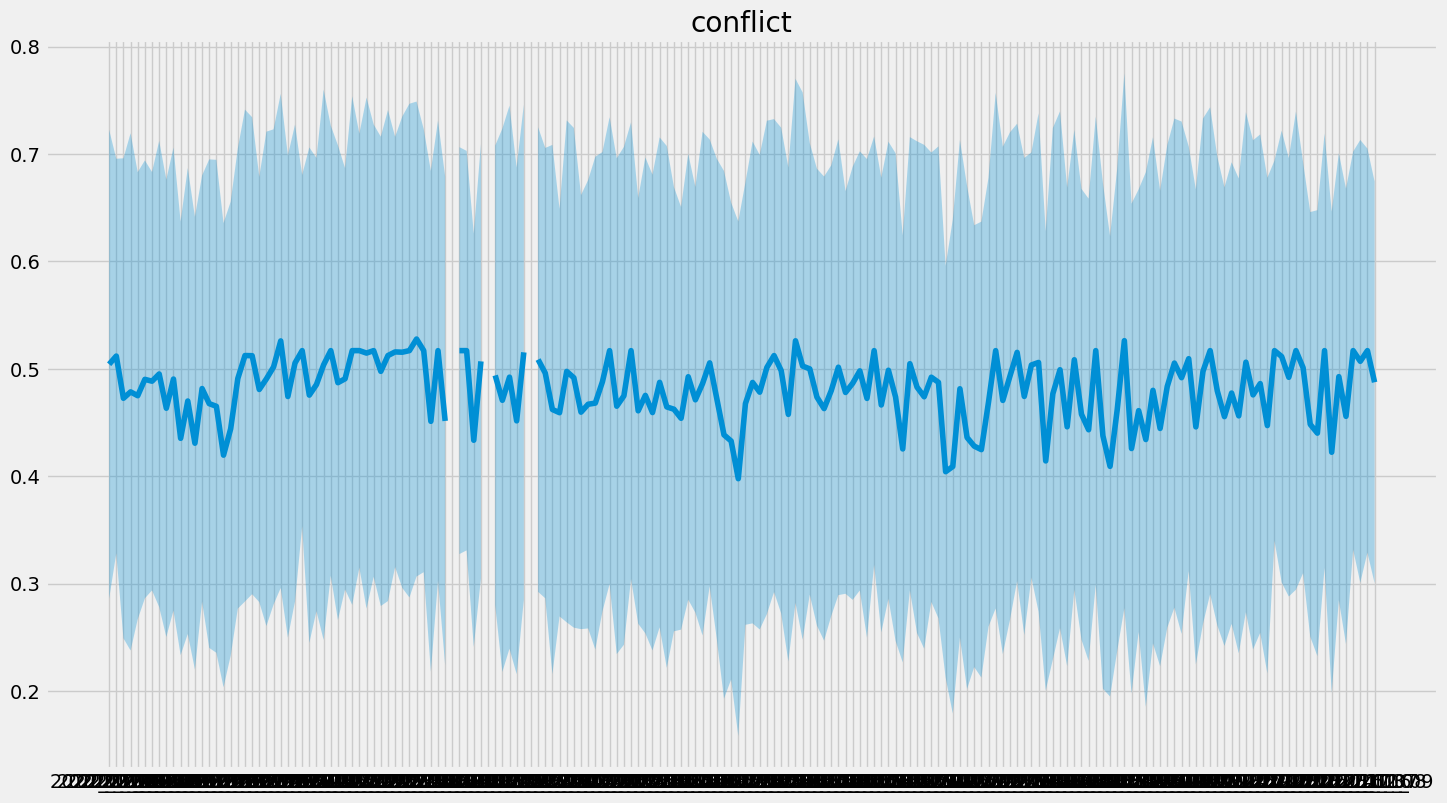

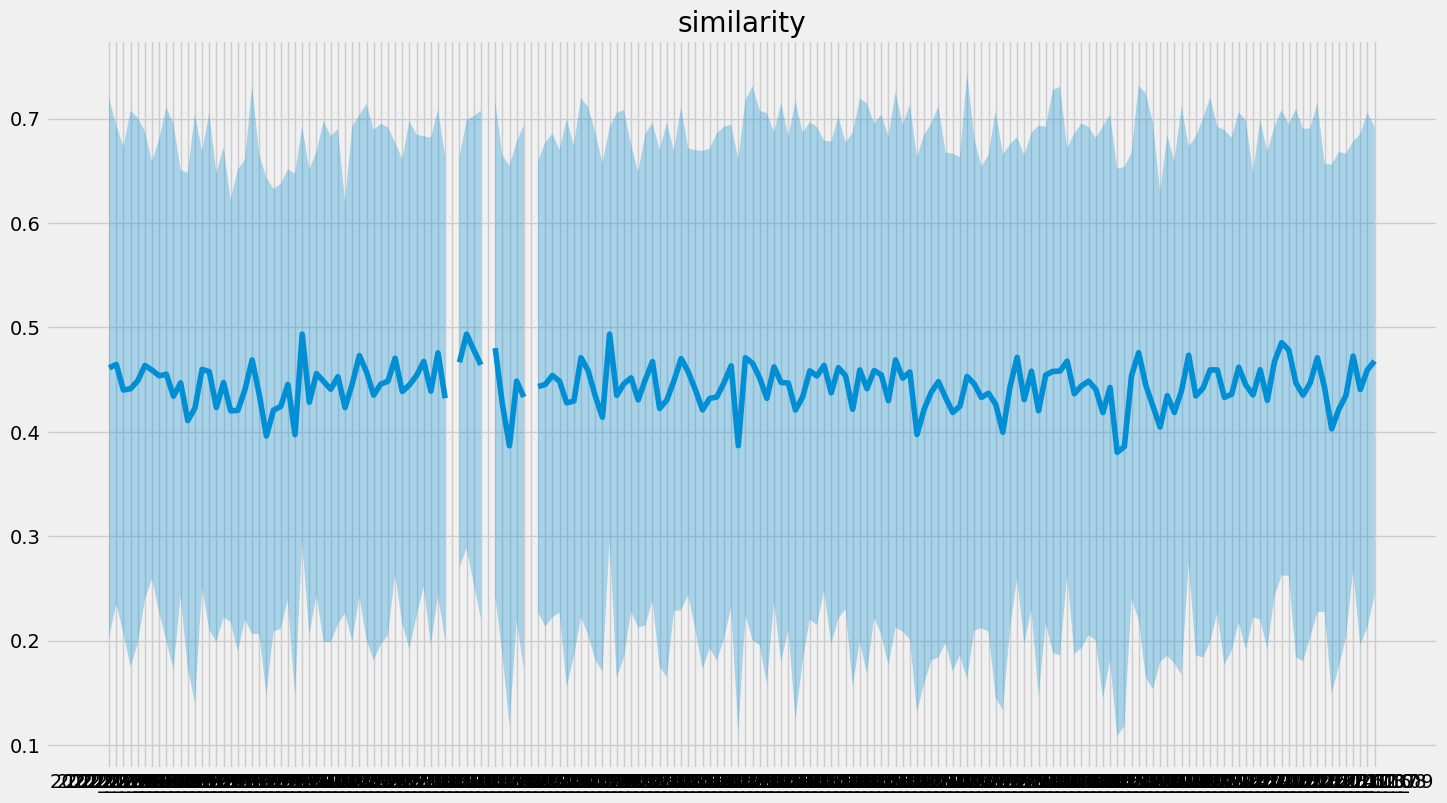

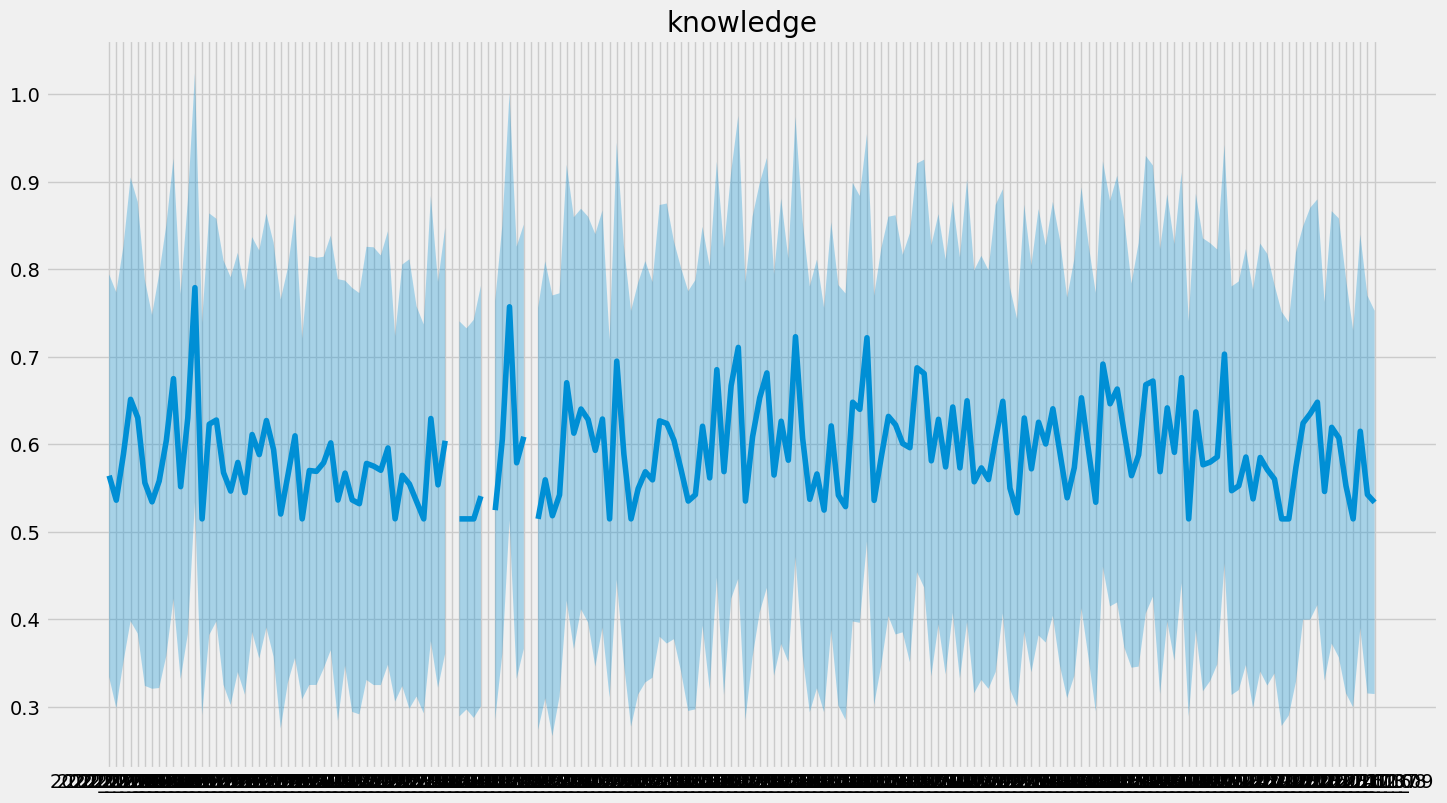

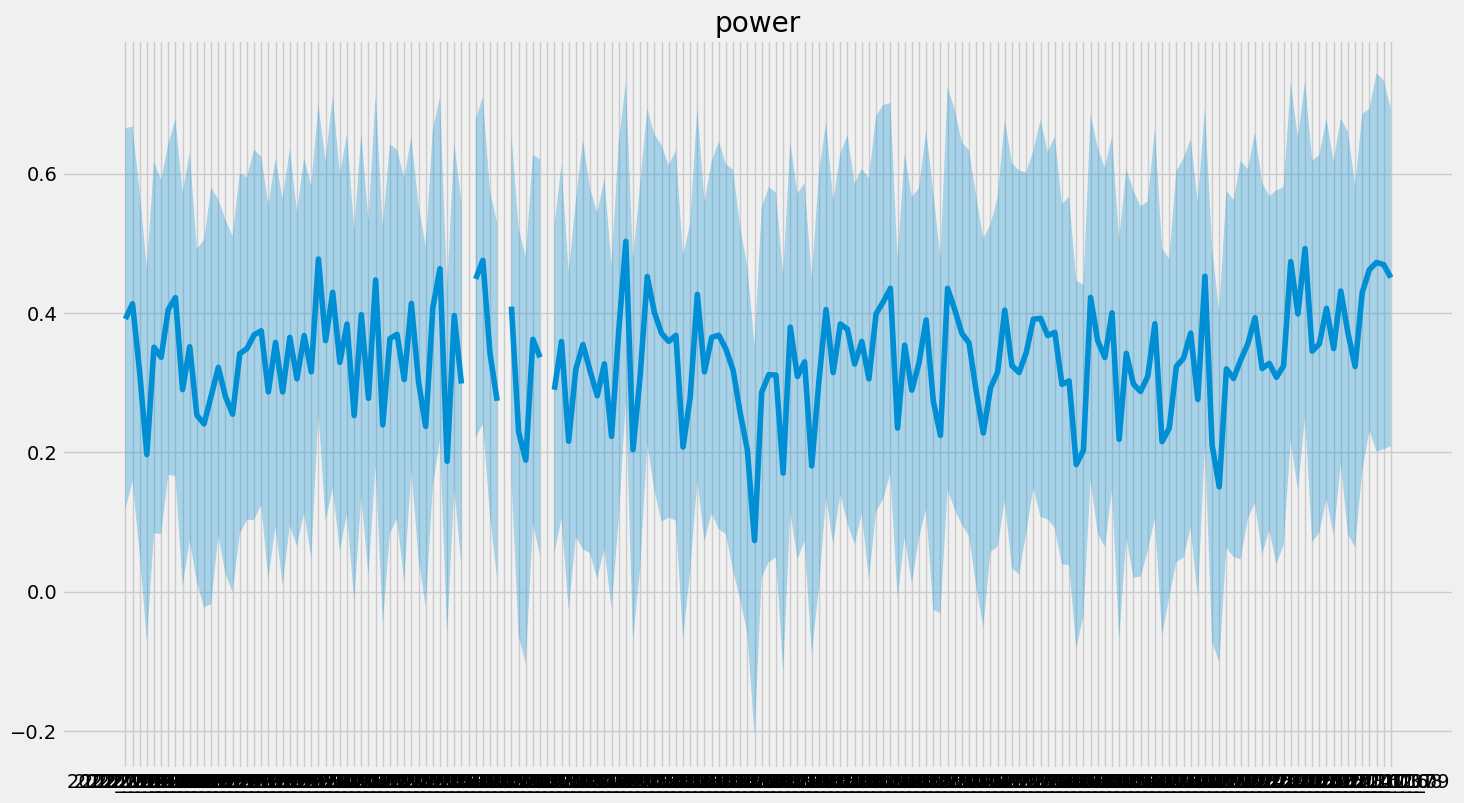

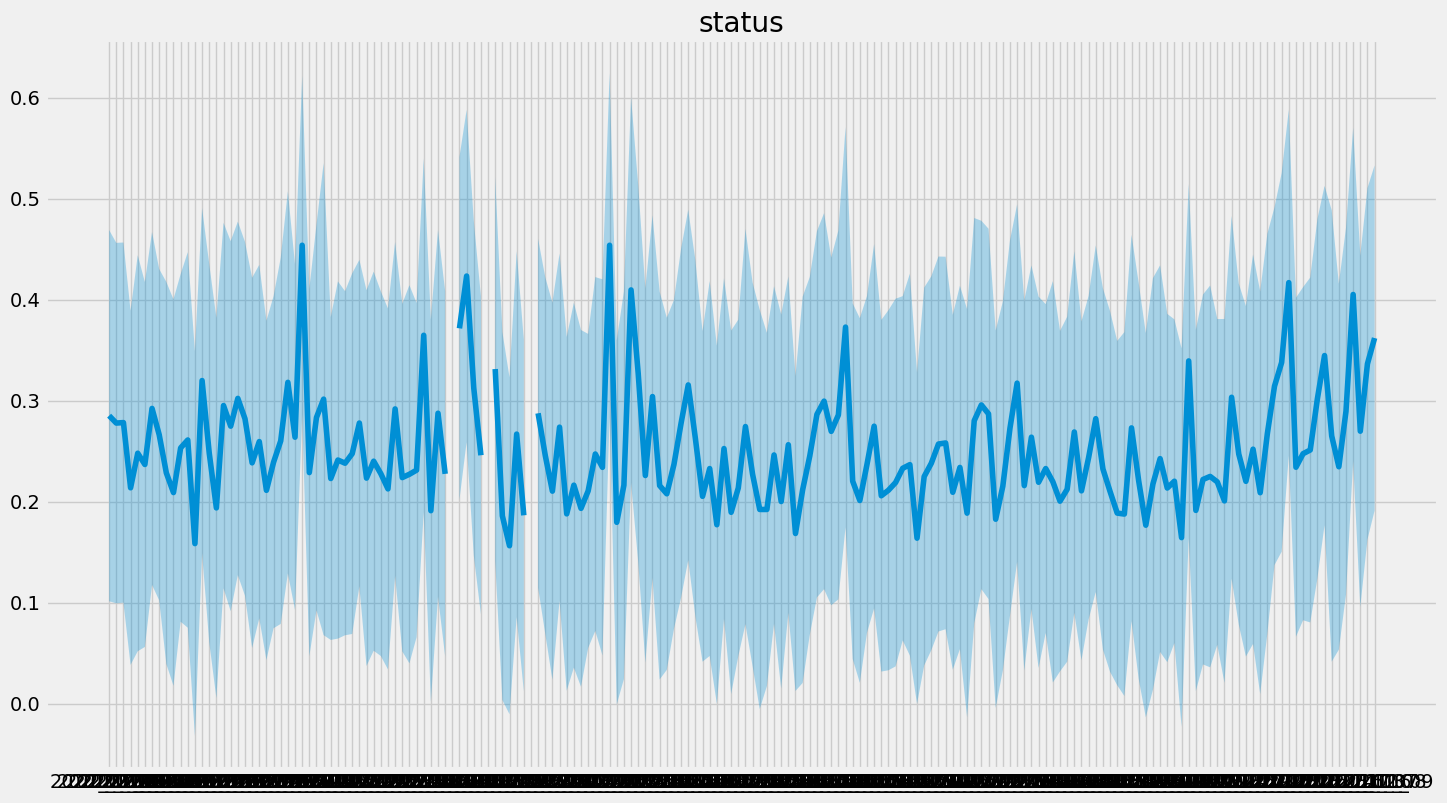

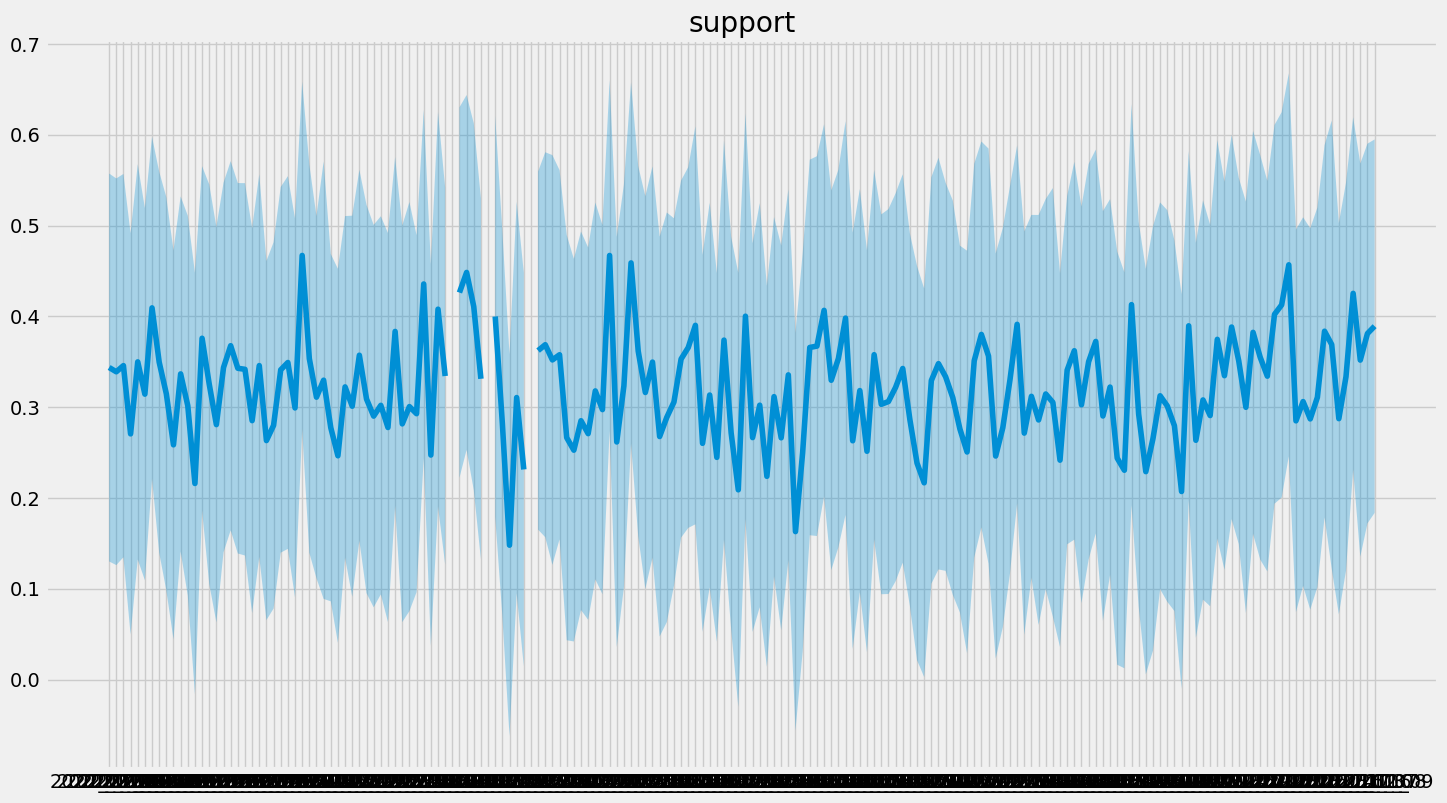

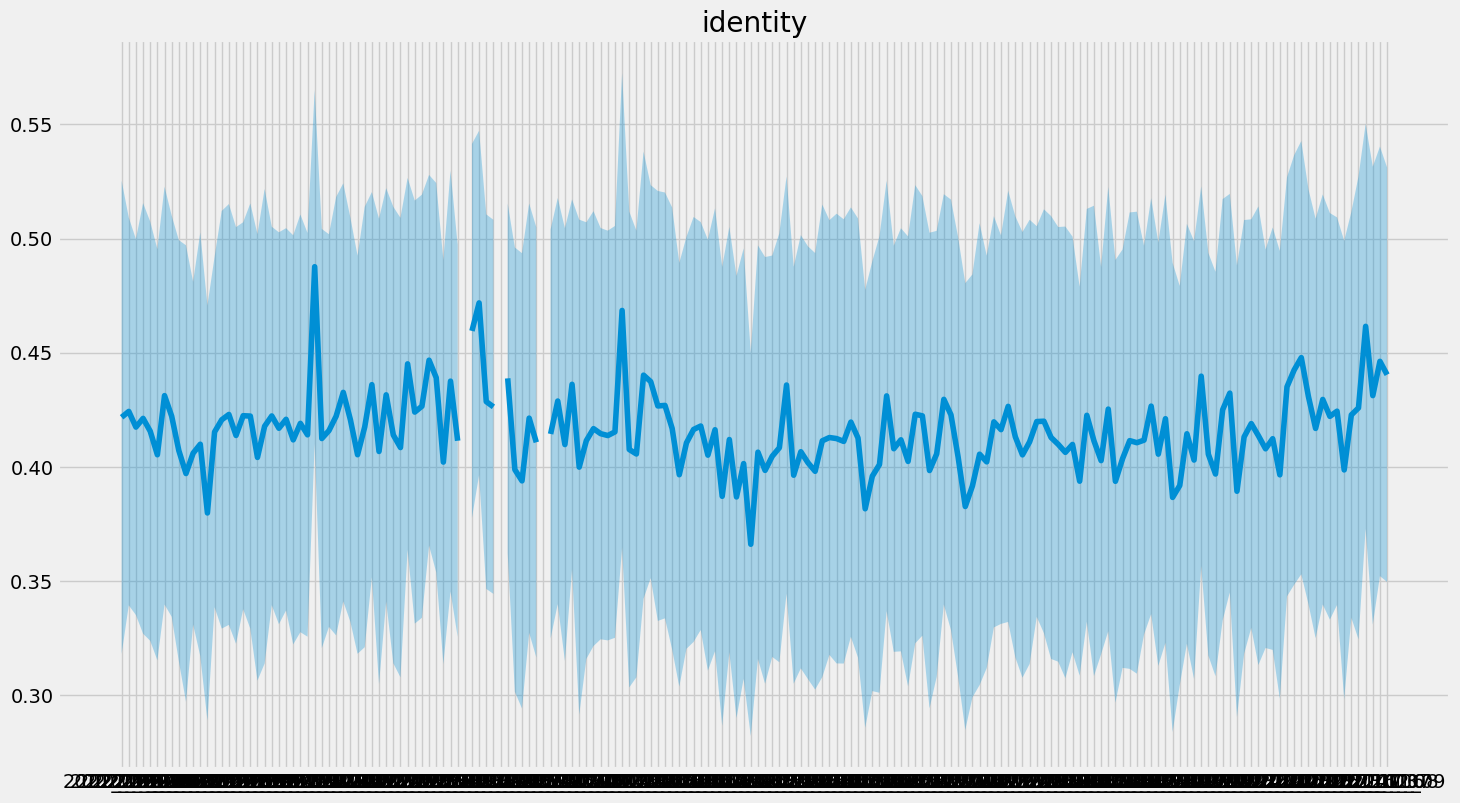

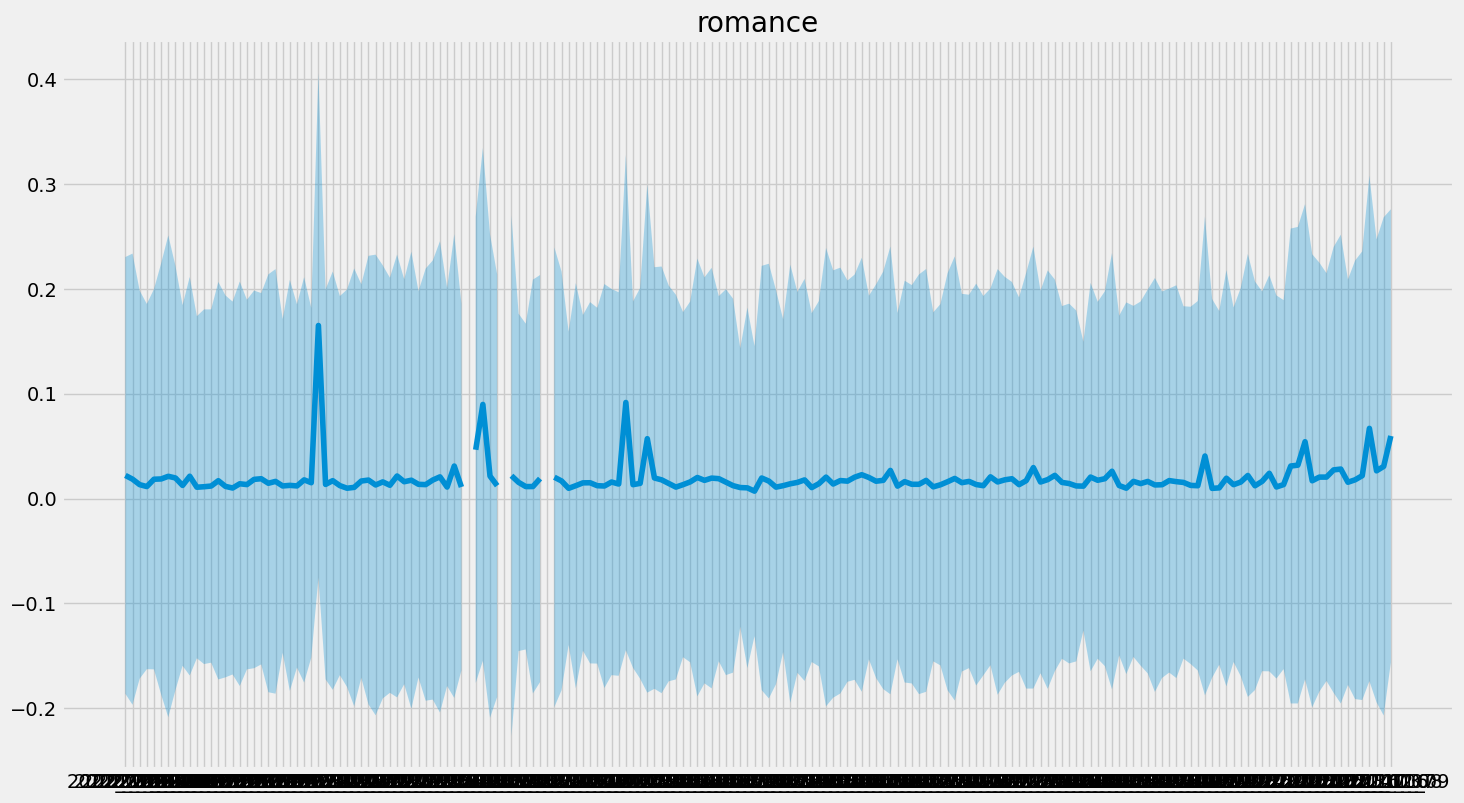

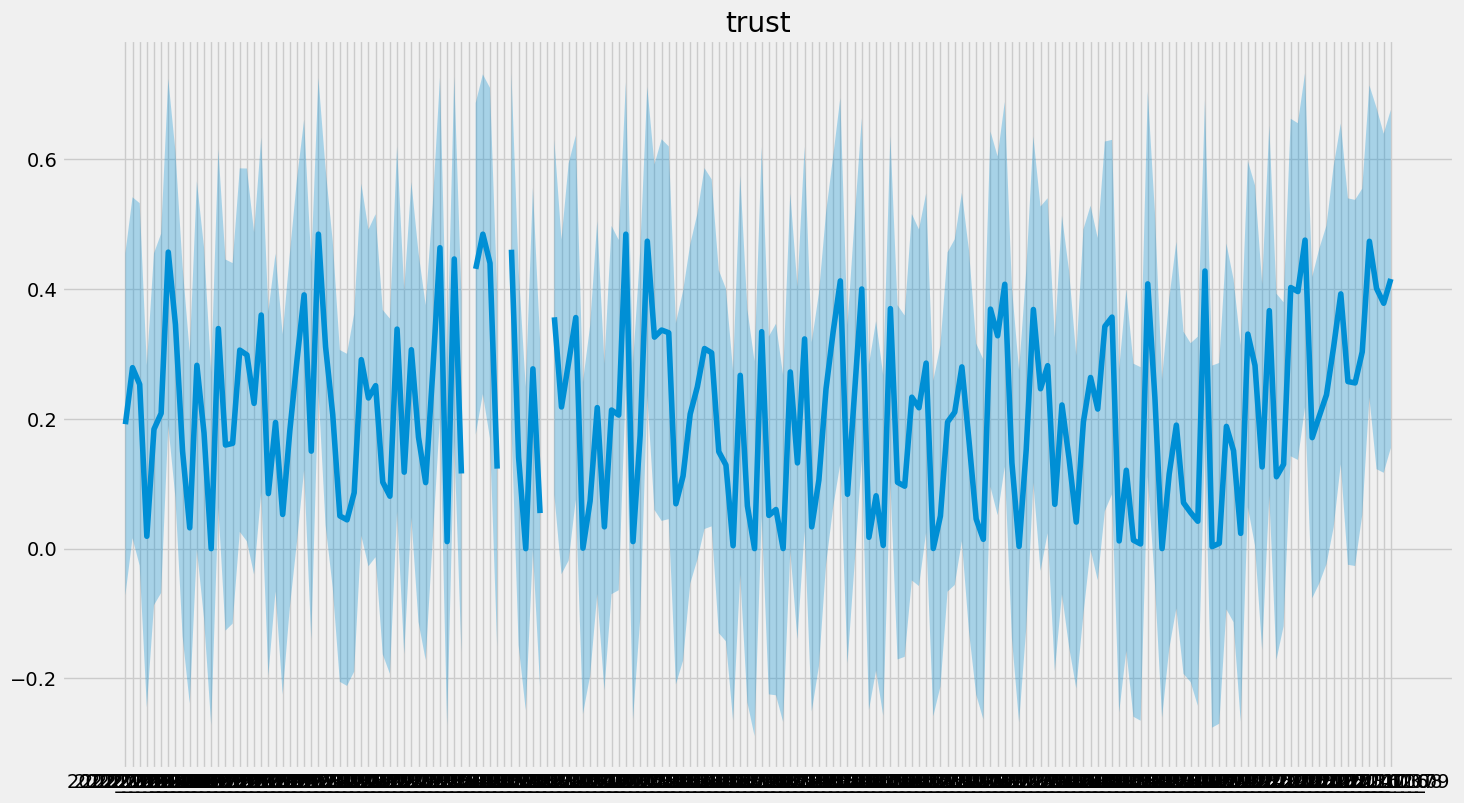

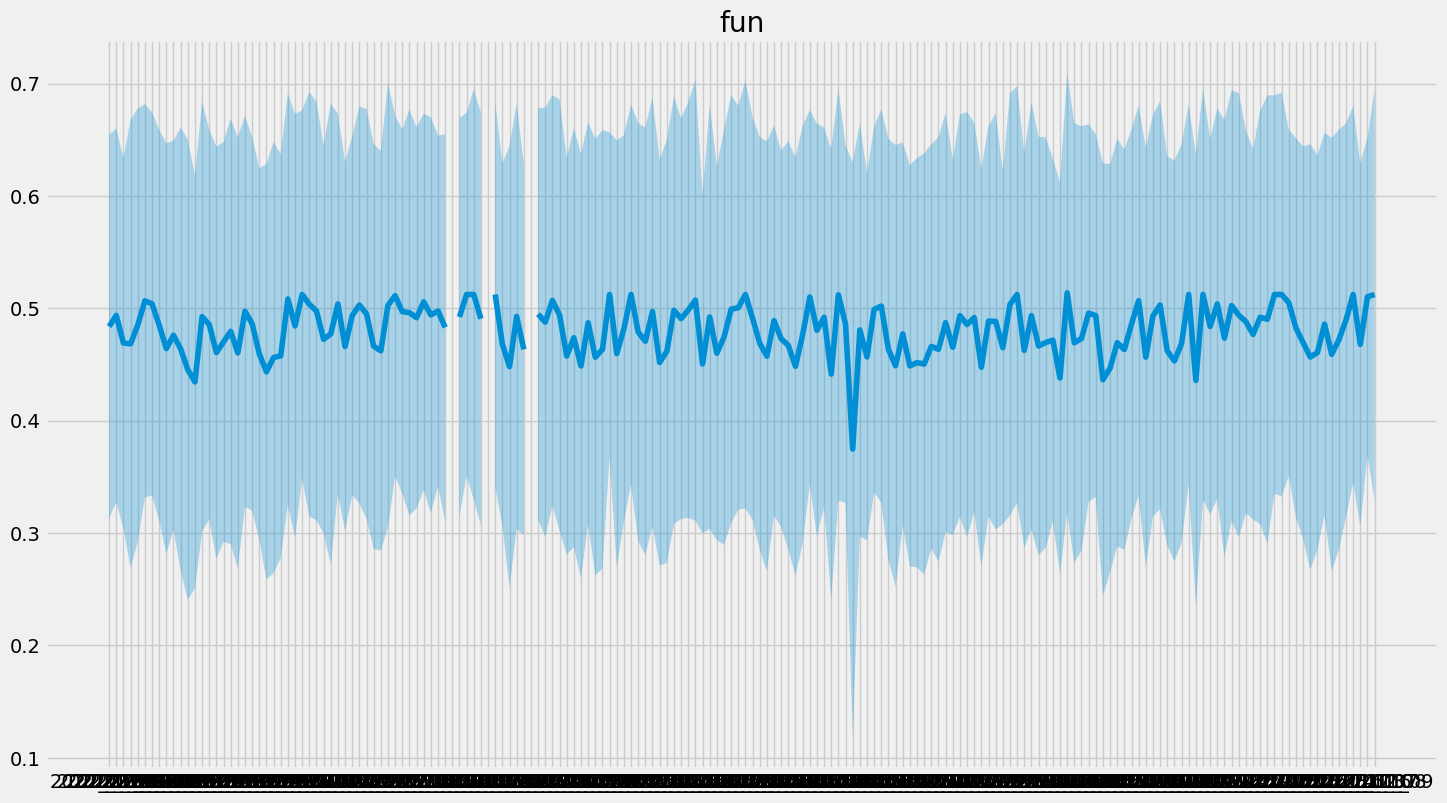

In [23]:
for dim in sol_agg_mean.columns[1:]:
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=[16,9])
    plt.title(dim)
    plt.plot(dfs[dim]['date'],
             dfs[dim]['mean'])
    
    plt.fill_between(dfs[dim]['date'],
                     dfs[dim]['min'],
                     dfs[dim]['max'],
                     alpha=.3)

    plt.show()

dtale.show(pd.DataFrame({dim:dfs[dim]['mean'] for dim in dfs.keys()}))

## Create Bitcoin Dataset

In [24]:
all_files = os.listdir(filepath)
comments = {}
posts = {}
for fname in tqdm(all_files):
    file = pd.read_csv(filepath+fname,sep='\t').drop('Unnamed: 0',axis=1)
    if 'submission' in fname:
        posts['_'.join(fname.split('_')[3:6])] = file      
    if 'comment' in fname:
        comments['_'.join(fname.split('_')[3:6])] = file
        
        
subset = []
for date,df in posts.items():
    df['date'] = date
    df['text_type'] = "post" 
    subset.append(df)
    
    
merged_posts = pd.concat(subset)
subset = []
for date,df in comments.items():
    df['date'] = date
    df['text_type'] = "comment" 
    subset.append(df)
    
merged_comments = pd.concat(subset)


cols = ['corpus','date','text_type','subreddit','conflict','similarity','knowledge','power','status','support','identity','romance','trust','fun']
posts_df = merged_posts[cols]
comments_df = merged_comments[cols]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 590/590 [00:10<00:00, 55.81it/s]


In [25]:
coin_path = "data/coins/"
coin_fnames = os.listdir(coin_path)
coin_frames = {fname.split('.')[0].split('-')[1]:pd.read_csv(coin_path+fname).drop('Unnamed: 0',axis=1) for fname in coin_fnames}

BTC_prices = coin_frames['BTC']
BTC_prices['Date'] = BTC_prices['Date'].apply(lambda x: x.replace('-','_'))

BTC_prices['Mean'] = (BTC_prices['High']+BTC_prices['Low'])/2
BTC_prices

,Date,Open,High,Low,Close,Volume,Market Cap,Mean
0,2022_09_18,20127.233948,20127.233948,19387.491348,19419.506191,3.125478e+10,3.719704e+11,19757.362648
1,2022_09_17,19777.034028,20162.532022,19777.034028,20127.576657,2.495745e+10,3.855133e+11,19969.783025
2,2022_09_16,19704.005441,19870.629766,19400.075449,19772.584206,3.012336e+10,3.786932e+11,19635.352608
3,2022_09_15,20242.289908,20318.166392,19636.733774,19701.209963,3.638901e+10,3.773113e+11,19977.450083
4,2022_09_14,20184.555325,20467.201433,19793.396718,20241.089802,3.787238e+10,3.876319e+11,20130.299075
...,...,...,...,...,...,...,...,...
3426,2013_05_02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,108.940948
3427,2013_05_01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,123.805000
3428,2013_04_30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,140.489998
3429,2013_04_29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09,140.744003


In [26]:
sources = ['posts','comments','combined']
source_map = {'posts':posts_df,
              'comments':comments_df,
              'combined':pd.concat([posts_df,comments_df])}

source_choice = sources[-1]



aggregation = 'median'


#cols = ['corpus','date','conflict','similarity','knowledge','power','status','support','identity','romance','trust','fun']

source_df = source_map[source_choice]

btc_reddit = source_df.loc[source_df.subreddit == 'Bitcoin'][cols].sort_values('date')
btc_reddit

,corpus,date,text_type,subreddit,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
108,invest in cryptocurrency using paxful removed,2022_01_02,post,Bitcoin,0.428484,0.429621,0.693272,0.587397,0.347396,0.433853,0.503711,0.082732,5.618975e-01,0.262231
66,in honor of hal finney the inaugural running b...,2022_01_02,post,Bitcoin,0.128358,0.006815,0.989936,0.039752,0.197273,0.304415,0.320837,0.001410,8.298105e-07,0.264381
65,in honor of hal finney the inaugural running b...,2022_01_02,post,Bitcoin,0.316497,0.186380,0.651785,0.190209,0.386639,0.350347,0.389105,0.011938,5.916070e-01,0.469555
64,stolen seed i have a question regarding people...,2022_01_02,post,Bitcoin,0.882927,0.007469,0.988437,0.024338,0.128773,0.002562,0.160387,0.003984,8.469893e-07,0.208423
63,bitcoin prototype bit gold by nick szabo 1998 ...,2022_01_02,post,Bitcoin,0.330860,0.085265,0.868963,0.090066,0.273570,0.175537,0.472902,0.006401,3.738376e-05,0.369482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,remember that embarrassing thing in high schoo...,2022_11_09,comment,Bitcoin,0.085449,0.783484,0.619302,0.015285,0.113561,0.326193,0.389684,0.080402,6.451114e-01,0.713825
118,that s why i spend everything i can on bitcoin...,2022_11_09,comment,Bitcoin,0.115963,0.194062,0.948707,0.017420,0.066770,0.173337,0.183617,0.002718,8.337976e-07,0.423309
117,using qr ingrained gold leafs as physical tran...,2022_11_09,comment,Bitcoin,0.375630,0.289607,0.941603,0.032308,0.187667,0.032184,0.416249,0.013707,8.556129e-07,0.116874
126,btc is a fancy lottery ticket it s either goin...,2022_11_09,comment,Bitcoin,0.418905,0.008516,0.988385,0.054717,0.075944,0.003615,0.530918,0.058263,8.458398e-07,0.426632


In [28]:
btc_full = pd.merge(btc_reddit,BTC_prices[['Date','High','Low','Mean']],left_on='date',right_on='Date').drop('Date',axis=1)
btc_full.set_index('date',inplace=True)

In [29]:
event_dict = {'eventID':[1,2,3,4,5,6],
              
             'before_start':['2022-03-05','2022-01-27','2022-02-23','2022-06-01','2022-04-27','2022-01-12'],
             'before_end':['2022-03-13','2022-02-03','2022-02-27','2022-06-07','2022-05-04','2022-01-18'],
              
             'during_start':['2022-03-13','2022-02-03','2022-02-27','2022-06-07','2022-05-04','2022-01-18'],
             'during_end':['2022-03-28','2022-02-09','2022-03-01','2022-06-18','2022-05-12','2022-01-22'],
              
             'after_start':['2022-03-28','2022-02-09','2022-03-01','2022-06-18','2022-05-12','2022-01-22'],
             'after_end':['2022-04-04','2022-02-16','2022-03-07','2022-07-01','2022-05-19','2022-01-30'],
    
             'event_type':['positive','positive','positive','negative','negative','negative']}



event_frame = pd.DataFrame(event_dict)
event_frame

,eventID,before_start,before_end,during_start,during_end,after_start,after_end,event_type
0,1,2022-03-05,2022-03-13,2022-03-13,2022-03-28,2022-03-28,2022-04-04,positive
1,2,2022-01-27,2022-02-03,2022-02-03,2022-02-09,2022-02-09,2022-02-16,positive
2,3,2022-02-23,2022-02-27,2022-02-27,2022-03-01,2022-03-01,2022-03-07,positive
3,4,2022-06-01,2022-06-07,2022-06-07,2022-06-18,2022-06-18,2022-07-01,negative
4,5,2022-04-27,2022-05-04,2022-05-04,2022-05-12,2022-05-12,2022-05-19,negative
5,6,2022-01-12,2022-01-18,2022-01-18,2022-01-22,2022-01-22,2022-01-30,negative


In [30]:
event_frame.head()

,eventID,before_start,before_end,during_start,during_end,after_start,after_end,event_type
0,1,2022-03-05,2022-03-13,2022-03-13,2022-03-28,2022-03-28,2022-04-04,positive
1,2,2022-01-27,2022-02-03,2022-02-03,2022-02-09,2022-02-09,2022-02-16,positive
2,3,2022-02-23,2022-02-27,2022-02-27,2022-03-01,2022-03-01,2022-03-07,positive
3,4,2022-06-01,2022-06-07,2022-06-07,2022-06-18,2022-06-18,2022-07-01,negative
4,5,2022-04-27,2022-05-04,2022-05-04,2022-05-12,2022-05-12,2022-05-19,negative


In [37]:
btc_full.drop('subreddit',axis=1,inplace=True)

In [40]:
btc_full.head()

,corpus,text_type,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean
date,,,,,,,,,,,,,,,
2022_01_02,invest in cryptocurrency using paxful removed,post,0.428484,0.429621,0.693272,0.587397,0.347396,0.433853,0.503711,0.082732,5.618975e-01,0.262231,47881.406233,46856.93631,47369.171271
2022_01_02,in honor of hal finney the inaugural running b...,post,0.128358,0.006815,0.989936,0.039752,0.197273,0.304415,0.320837,0.001410,8.298105e-07,0.264381,47881.406233,46856.93631,47369.171271
2022_01_02,in honor of hal finney the inaugural running b...,post,0.316497,0.186380,0.651785,0.190209,0.386639,0.350347,0.389105,0.011938,5.916070e-01,0.469555,47881.406233,46856.93631,47369.171271
2022_01_02,stolen seed i have a question regarding people...,post,0.882927,0.007469,0.988437,0.024338,0.128773,0.002562,0.160387,0.003984,8.469893e-07,0.208423,47881.406233,46856.93631,47369.171271
2022_01_02,bitcoin prototype bit gold by nick szabo 1998 ...,post,0.330860,0.085265,0.868963,0.090066,0.273570,0.175537,0.472902,0.006401,3.738376e-05,0.369482,47881.406233,46856.93631,47369.171271


In [48]:
btc_full.reset_index(inplace=True)
btc_full['date'] = btc_full['date'].apply(lambda x: x.replace('_','-'))

In [53]:
periods = []

for k,row in tqdm(event_frame.iterrows()):

  
    
    before = btc_full.loc[(btc_full['date']>row['before_start'])&(btc_full['date']<=row['before_end'])]
    if before.shape[0]:
        before['event_id'] = [row['eventID']]*before.shape[0]
        before['event_type'] = [row['event_type']]*before.shape[0]
        before['period_type'] = ['before']*before.shape[0]
        periods.append(before)
        
        
    during = btc_full.loc[(btc_full['date']>row['during_start'])&(btc_full['date']<=row['during_end'])]
    if during.shape[0]:
        during['event_id'] = [row['eventID']]*during.shape[0]
        during['event_type'] = [row['event_type']]*during.shape[0]
        during['period_type'] = ['during']*during.shape[0]
        periods.append(during)
                       
                       
    after = btc_full.loc[(btc_full['date']>row['after_start'])&(btc_full['date']<=row['after_end'])]
    if after.shape[0]:
        after['event_id'] = [row['eventID']]*after.shape[0]
        after['event_type'] = [row['event_type']]*after.shape[0]
        after['period_type'] = ['after']*after.shape[0]
        periods.append(after)
    

df_temp = pd.concat(periods)    
df_temp.shape

0it [00:00, ?it/s]/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_1704/2049502668.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_1704/2049502668.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_1704/2049502668.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

(42710, 19)

In [55]:
boring = btc_full.loc[~btc_full.date.isin(df_temp.date.values)]
boring['period_type'] = [None]*boring.shape[0]
boring['event_id'] = [None]*boring.shape[0]
boring['event_type'] = [None]*boring.shape[0]
final = pd.concat([df_temp,boring])

final

/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_1704/2711685107.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_1704/2711685107.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_1704/2711685107.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,date,corpus,text_type,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean,event_id,event_type,period_type
21948,2022-03-06,sarn sauron coin bsc gem of 2022 launch now e...,post,0.217982,0.008616,0.987545,0.095460,0.210643,0.012049,0.401652,0.004092,8.436824e-07,0.404854,39640.176751,38211.647962,38925.912357,1,positive,before
21949,2022-03-06,a proposal to you removed,post,0.503045,0.435572,0.485023,0.518171,0.427520,0.495435,0.432057,0.254124,3.306695e-01,0.453298,39640.176751,38211.647962,38925.912357,1,positive,before
21950,2022-03-06,time to buy nan,post,0.315845,0.453668,0.491014,0.467255,0.453663,0.485220,0.443327,0.571401,4.674791e-01,0.595824,39640.176751,38211.647962,38925.912357,1,positive,before
21951,2022-03-06,stupid question please excuse my ignorance can...,post,0.685344,0.003814,0.995469,0.033478,0.095750,0.000713,0.207318,0.000114,8.855732e-07,0.099581,39640.176751,38211.647962,38925.912357,1,positive,before
21952,2022-03-06,bitcoin nan,post,0.488357,0.469591,0.483014,0.434496,0.515467,0.484323,0.482162,0.507920,5.038089e-01,0.523179,39640.176751,38211.647962,38925.912357,1,positive,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75521,2022-09-18,hi u alfador8 thanks for tipping u cryptoenthu...,comment,0.730620,0.003401,0.995973,0.980206,0.151547,0.000652,0.381715,0.000014,8.378324e-07,0.052759,20127.233948,19387.491348,19757.362648,None,None,None
75522,2022-09-18,i m very new,comment,0.221113,0.536141,0.441375,0.422223,0.597648,0.516809,0.502142,0.645875,6.132007e-01,0.539723,20127.233948,19387.491348,19757.362648,None,None,None
75523,2022-09-18,gt a purely peer to peer version of electroni...,comment,0.395776,0.093113,0.985907,0.042485,0.083406,0.026649,0.297737,0.009478,8.965515e-01,0.121190,20127.233948,19387.491348,19757.362648,None,None,None
75524,2022-09-18,the house is 87k how am i going to buy a a 94k...,comment,0.363920,0.168305,0.738788,0.239386,0.104419,0.204042,0.385997,0.012725,1.151722e-06,0.593254,20127.233948,19387.491348,19757.362648,None,None,None


In [59]:
final.

,date,corpus,text_type,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean,event_id,event_type,period_type
28704,2022-03-29,your submission has been flagged for removal b...,comment,0.206264,0.007405,0.988624,0.043150,0.231103,0.003004,0.354306,0.008196,8.421060e-07,0.300877,48022.288882,47100.438598,47561.363740,1,positive,after
28705,2022-03-29,removed,comment,0.517019,0.493611,0.514874,0.502974,0.453833,0.467075,0.498191,0.514511,4.847693e-01,0.512314,48022.288882,47100.438598,47561.363740,1,positive,after
28706,2022-03-29,removed,comment,0.517019,0.493611,0.514874,0.502974,0.453833,0.467075,0.498191,0.514511,4.847693e-01,0.512314,48022.288882,47100.438598,47561.363740,1,positive,after
28707,2022-03-29,now i am curious in that man s short positions,comment,0.323905,0.543859,0.496358,0.315429,0.468778,0.340901,0.479491,0.118782,4.841087e-01,0.430432,48022.288882,47100.438598,47561.363740,1,positive,after
28708,2022-03-29,i could have 1 in there for longterm but i cho...,comment,0.257445,0.495935,0.985742,0.023929,0.091876,0.010997,0.259711,0.005927,8.459350e-07,0.617805,48022.288882,47100.438598,47561.363740,1,positive,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,2022-01-30,did you go to clown school before or after you...,comment,0.737079,0.261136,0.561705,0.181459,0.086489,0.104970,0.226905,0.011734,8.575587e-07,0.865423,38266.339795,37437.709209,37852.024502,6,negative,after
10774,2022-01-30,no different refusal of service can be arbitra...,comment,0.681270,0.449117,0.654722,0.442550,0.266961,0.247258,0.519390,0.003420,5.421264e-01,0.278046,38266.339795,37437.709209,37852.024502,6,negative,after
10775,2022-01-30,here i am,comment,0.432459,0.508821,0.388477,0.465539,0.616521,0.530069,0.463161,0.652613,4.897885e-01,0.630679,38266.339795,37437.709209,37852.024502,6,negative,after
10776,2022-01-30,you won t doesn t matter either way since they...,comment,0.517445,0.247141,0.589378,0.102708,0.137244,0.186764,0.428059,0.002680,8.337840e-07,0.599340,38266.339795,37437.709209,37852.024502,6,negative,after


In [46]:
btc_full.loc[(btc_full.index>'2022-01-22')&(btc_full.index<='2022-01-30')]

,corpus,text_type,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean
date,,,,,,,,,,,,,,,


,corpus,text_type,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean
date,,,,,,,,,,,,,,,
2022_09_18,yeah i think it is possible to manipulate this...,comment,0.044327,0.525772,0.733447,0.032576,0.208375,0.419736,0.513854,0.011222,1.557398e-01,0.443168,20127.233948,19387.491348,19757.362648
2022_09_18,any apps similar to cashapp and strike talking...,post,0.233573,0.396267,0.983670,0.093698,0.086475,0.028567,0.259606,0.012857,9.508545e-01,0.293430,20127.233948,19387.491348,19757.362648
2022_09_18,a friend needs to get money into russia for hi...,post,0.112593,0.020355,0.715246,0.030018,0.156085,0.762599,0.299450,0.004787,8.468491e-01,0.353798,20127.233948,19387.491348,19757.362648
2022_09_18,the irony kind of funny how the fed can have a...,post,0.620536,0.090188,0.985102,0.009804,0.063108,0.011199,0.333330,0.011367,8.432930e-07,0.995392,20127.233948,19387.491348,19757.362648
2022_09_18,bitcoin subreddit subscribers subredditstats c...,post,0.315175,0.353606,0.534047,0.408641,0.525622,0.381832,0.471051,0.172897,5.517660e-01,0.526233,20127.233948,19387.491348,19757.362648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022_01_02,bitcoin is end the god told me in last night d...,post,0.920711,0.959870,0.921639,0.017808,0.070408,0.005807,0.256747,0.004663,8.374506e-07,0.655202,47881.406233,46856.936310,47369.171271
2022_01_02,got the strike app and curious how they don t ...,post,0.357115,0.014639,0.972599,0.744863,0.142598,0.017028,0.384358,0.008996,8.658471e-07,0.295364,47881.406233,46856.936310,47369.171271
2022_01_02,the swirl token nan,post,0.500584,0.469505,0.448407,0.439169,0.480689,0.465235,0.472454,0.524642,4.332049e-01,0.439045,47881.406233,46856.936310,47369.171271


In [295]:
event_id = []
event_type = []
period_type = []

for k,row in tqdm(btc_full.iterrows()):
    not_app = False
    for k2, row2 in event_frame.iterrows():
        if (k>row2['before_start']) and (k<=row2['before_end']):
            event_id.append(row2['eventID'])
            event_type.append(row2['event_type'])
            period_type.append('before')
            not_app=True
        elif (k>row2['during_start']) and (k<=row2['during_end']):
            event_id.append(row2['eventID'])
            event_type.append(row2['event_type'])
            period_type.append('during')
            not_app=True
            
        elif (k>row2['after_end']) and (k<=row2['after_end']):
            event_id.append(row2['eventID'])
            event_type.append(row2['event_type'])
            period_type.append('end') 
            not_app=True
    
    if not_app:

        event_id.append(None)
        event_type.append(None)
        period_type.append(None)
            
            
btc_full['event_id'] = event_id
btc_full['event_type'] = event_type
btc_full['period_type'] = period_type
btc_full

75526it [00:35, 2127.41it/s]


ValueError: Length of values (0) does not match length of index (75526)

In [ ]:
btc_full.shape